<a href="https://colab.research.google.com/github/etappau/imdb/blob/master/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
Weather = pd.read_csv('DentonWeather.csv',header=0, index_col='ID')
#Drop rows with missing data
Weather = Weather.dropna()
Weather['DATE'] = pd.to_datetime(Weather[['Year', 'Month', 'Day']])
#Weather.set_index('DATE', inplace=True)
#Weather = Weather.drop(['Year', 'Month', 'Day'], axis=1)
# If there's any rain at all, mark that!
Weather['RAIN'] = np.where(Weather['PRCP'] > 0, 1, 0)
Weather.head()

,Year,Month,Day,AWND,PRCP,TAVG,TMAX,TMIN,DATE,RAIN
ID,,,,,,,,,,
1001,1998,4,1,5.14,0.0,61.0,81.0,41.0,1998-04-01,0
1002,1998,4,2,10.29,0.0,62.0,77.0,47.0,1998-04-02,0
1003,1998,4,3,16.11,0.0,56.0,67.0,45.0,1998-04-03,0
1004,1998,4,4,7.16,0.0,49.0,62.0,36.0,1998-04-04,0
1005,1998,4,5,9.62,0.0,56.0,74.0,38.0,1998-04-05,0


In [4]:
data = Weather[(Weather['DATE'] >= "2018-01-01") & (Weather['DATE'] <= "2018-12-31")]
data.tail()

,Year,Month,Day,AWND,PRCP,TAVG,TMAX,TMIN,DATE,RAIN
ID,,,,,,,,,,
8565,2018,12,27,12.30,0.02,47.5,60.0,35.0,2018-12-27,1
8566,2018,12,28,10.07,0.00,37.5,45.0,30.0,2018-12-28,0
8567,2018,12,29,10.07,0.00,36.0,40.0,32.0,2018-12-29,0
8568,2018,12,30,4.70,0.02,36.5,41.0,32.0,2018-12-30,1
8569,2018,12,31,9.17,0.41,49.0,60.0,38.0,2018-12-31,1


In [5]:
data.set_index('DATE', inplace=True)
data

,Year,Month,Day,AWND,PRCP,TAVG,TMAX,TMIN,RAIN
DATE,,,,,,,,,
2018-01-01,2018,1,1,10.74,0.00,20.0,27.0,13.0,0
2018-01-02,2018,1,2,6.04,0.00,21.0,24.0,18.0,0
2018-01-03,2018,1,3,6.71,0.00,29.5,48.0,11.0,0
2018-01-04,2018,1,4,3.36,0.00,33.5,48.0,19.0,0
2018-01-05,2018,1,5,3.80,0.00,42.0,62.0,22.0,0
...,...,...,...,...,...,...,...,...,...
2018-12-27,2018,12,27,12.30,0.02,47.5,60.0,35.0,1
2018-12-28,2018,12,28,10.07,0.00,37.5,45.0,30.0,0
2018-12-29,2018,12,29,10.07,0.00,36.0,40.0,32.0,0


In [0]:
data = data.drop(['Year', 'Day', 'TAVG'], axis=1)

In [0]:
import calendar
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
data["Month"]=data.Month.apply(lambda x:calendar.month_abbr[x])

In [8]:
data.tail()

,Month,AWND,PRCP,TMAX,TMIN,RAIN
DATE,,,,,,
2018-12-27,Dec,12.30,0.02,60.0,35.0,1
2018-12-28,Dec,10.07,0.00,45.0,30.0,0
2018-12-29,Dec,10.07,0.00,40.0,32.0,0
2018-12-30,Dec,4.70,0.02,41.0,32.0,1
2018-12-31,Dec,9.17,0.41,60.0,38.0,1


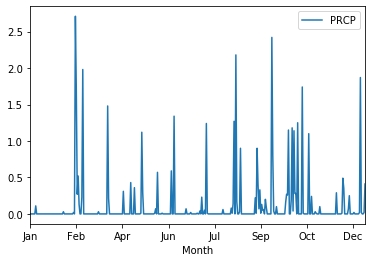

In [9]:
data.plot(y='PRCP', x='Month')

In [10]:
data.groupby(['Month']).aggregate('PRCP').sum().sort_values()

Month
Jan    0.11
Nov    0.67
Apr    1.10
Jul    1.64
Mar    1.72
Jun    2.02
May    2.08
Dec    3.53
Aug    4.78
Sep    5.85
Feb    7.57
Oct    9.05
Name: PRCP, dtype: float64

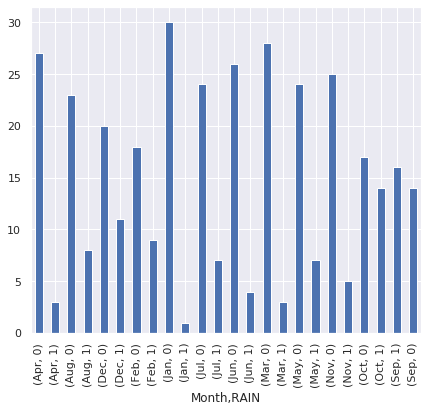

In [16]:
data.groupby(['Month'])['RAIN'].value_counts().plot(kind='bar',figsize=(7, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6a21cca90>,
      dtype=object)

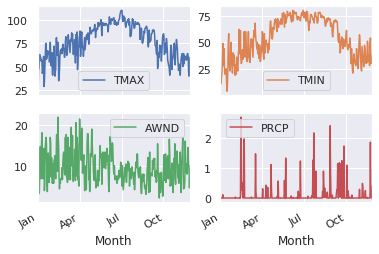

In [13]:
data.plot(y=['TMAX','TMIN','AWND','PRCP'], x='Month', subplots=True, layout=(2,2))

In [0]:
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
from bokeh.models import HoverTool, BoxSelectTool #For enabling tools

In [0]:
Weather.set_index('DATE', inplace=True)
Weather = Weather.drop(['Year', 'Month', 'Day', 'TAVG'], axis=1)

In [0]:
Weather.tail()

,AWND,PRCP,TMAX,TMIN
DATE,,,,
2019-01-31,9.62,0.0,54.0,35.0
2019-02-01,7.38,0.0,60.0,50.0
2019-02-02,8.05,0.0,65.0,53.0
2019-02-03,13.87,0.0,73.0,59.0
2019-02-04,9.62,0.0,81.0,56.0


In [0]:
TOOLS = [BoxSelectTool(), HoverTool()]

start_time = "1998-04-01"
end_time = "1998-04-20"

ax = Weather.plot(title='Denton temperatures',
                         xlabel='Date', ylabel='Temperature [°F]',
                         xlim=[start_time, end_time], ylim=[35.0, 100.0])

In [0]:
Weather['RAIN'] = np.where(Weather['PRCP'] > 0, 1, 0)

In [0]:
Weather['RAIN'].value_counts()

0    5907
1    1697
Name: RAIN, dtype: int64

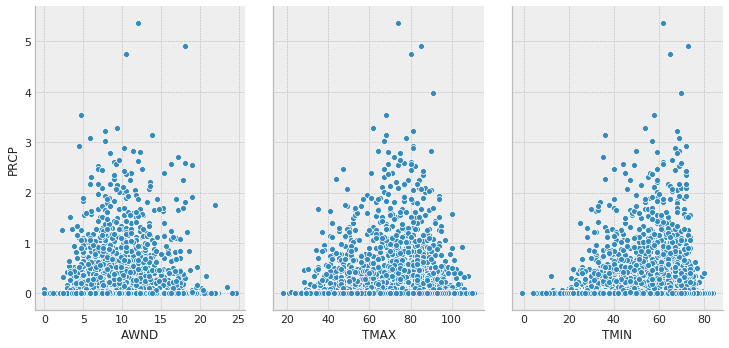

In [0]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(Weather, x_vars=['AWND', 'TMAX', 'TMIN'], y_vars='PRCP', height=5, aspect=0.7)

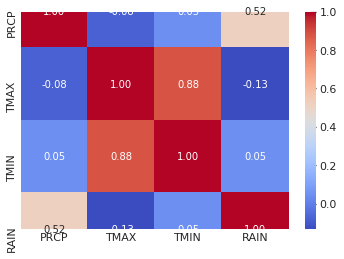

In [0]:
sns.heatmap(Weather[["PRCP","TMAX","TMIN","RAIN"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

*Feature Importance : To Predict Rain*

AWND = 0.0023483519029653187
PRCP = 0.9718113643379419
TMAX = 0.01590378550834893
TMIN = 0.009936498250743733


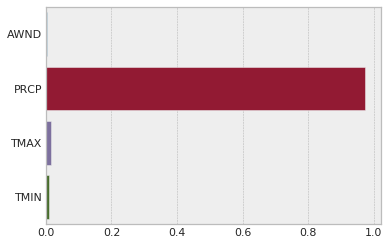

In [0]:
Weather = Weather.dropna()

rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf.fit(Weather.iloc[:,[3,4,6,7]],Weather.iloc[:,8])
for name, importance in zip(Weather.iloc[:,[3,4,6,7]].columns, rnd_clf.feature_importances_):
    print(name, "=", importance)

g = sns.barplot(y=Weather.iloc[:,[3,4,6,7]].columns,x = rnd_clf.feature_importances_, orient='h')

*Feature Importance : To Predict Max Temperature*

AWND = 0.39355481189383246
PRCP = 0.08890172216514593
TMIN = 0.5175434659410216


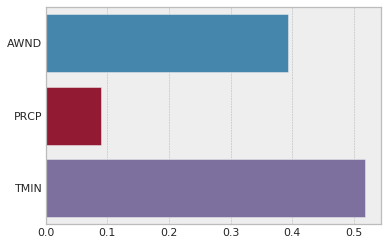

In [0]:
rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf.fit(Weather.iloc[:,[3,4,7]],Weather.iloc[:,6])
for name, importance in zip(Weather.iloc[:,[3,4,7]].columns, rnd_clf.feature_importances_):
    print(name, "=", importance)

g = sns.barplot(y=Weather.iloc[:,[3,4,7]].columns,x = rnd_clf.feature_importances_, orient='h')

In [0]:
##Modelling Linear Regression

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print(linear_model.score(X_test, y_test))

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

sns.plt.scatter(y_test, knn_model.predict(X_test))
sns.plt.title('KNN Prediction Analysis')
sns.plt.xlabel('Real Value')
sns.plt.ylabel('Prediction')
plt.show()

sns.plt.scatter(y_test, linear_model.predict(X_test))
sns.plt.title('Linear Regression Prediction Analysis')
sns.plt.xlabel('Real Value')
sns.plt.ylabel('Prediction')
plt.show()